# GATE output formats and Python

## GATE can output information in different formats:

### From actors, examples:
* SimulationStatisticActor : store number of events, tracks, steps in **ASCII**
* DoseActor : store absorbed dose in **ASCII, ROOT for 1D and 2D**, and **.hdr, .mhd for 3D**
* EnergySpectrumActor: store energy distribution in **ROOT**
* PhaseSpaceActor: store the particle's type, position, direction, energy, ... in **ROOT, IAEA, NumPy**

See https://opengate.readthedocs.io/en/latest/tools_to_interact_with_the_simulation_actors.html

### From imaging "systems" (scanner, CT, SPECT, PET, ...):
* to record interactions: hits, singles, coincidences in **ASCII, binary, ROOT, NumPy**
* to save images: projections and sinograms in **.hdr, .mhd**

See https://opengate.readthedocs.io/en/latest/data_output_management.html

## In summary, when using GATE you will produce one of these output formats:
* ASCII output
* Binary output
* Images (.mhd, .hdr) output
* ROOT tree output
* NumPy tree output (new!)

# Demonstration with the GATE application Ex_beam

#### We will first have a look at a GATE example to understand these outputs:
* open a terminal and go to the folder gate_outputs/Ex_beam
* look at the different files and open mac/main.mac
* look at all the sections and in particular to the ouputs section
* run the example with  
`Gate --qt mac/main.mac`
* check the output folder and the different files produced

#### We will now analyse each output with this Python notebook !

# GATE ASCII output

## 1D DoseActor (along Z)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load data from txt files
d_edep = np.loadtxt('Ex_Beam/output/1D-depth-Edep.txt')
d_uncert = np.loadtxt('Ex_Beam/output/1D-depth-Edep-Uncertainty.txt')

## Plot depth dose and uncertainty

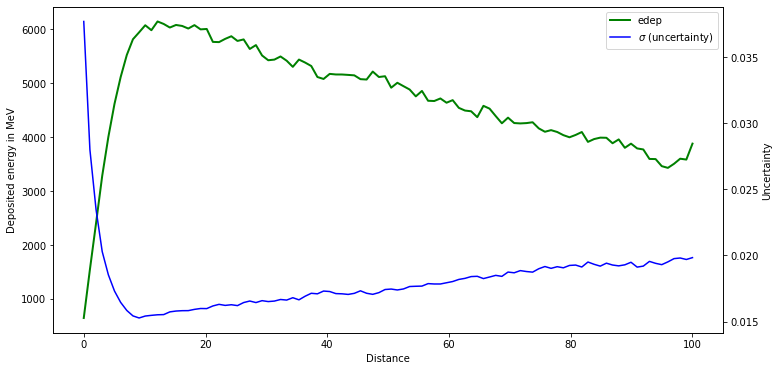

In [3]:
# Declare a single figure (one row, one column)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 6), facecolor='w')

# generate x for the plots
x = np.linspace(0, len(d_edep), len(d_edep))

# First curve, gamma depth in green
c1 = ax.plot(x, d_edep, 'g-', label='edep', linewidth=2)

# Second curve, gamma uncertainty in blue, share the same x axis, but use a different y axis
ax2 = ax.twinx()
c2 = ax2.plot(x, d_uncert, 'b-', label='$\sigma$ (uncertainty)')

# Add the legend and the title
fig.legend(bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
ax.set_xlabel('Distance')
ax.set_ylabel('Deposited energy in MeV')
f = ax2.set_ylabel('Uncertainty')

# GATE image output

## 3D DoseActor - format mhd/raw

In [4]:
import SimpleITK as sitk

img_dose = sitk.ReadImage('Ex_Beam/output/3D-Edep.mhd')
arr_dose = sitk.GetArrayFromImage(img_dose)
print('Image size = ', arr_dose.shape)
print('Image min and max: ',  np.amin(arr_dose), np.amax(arr_dose))

Image size =  (50, 50, 50)
Image min and max:  0.0 2296.927


In [5]:
arr_dose

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.26775542, ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.02601309, ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.00254495,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.02731014, 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.00588531, 0.00549145, 0.        , ..., 0.        ,
         0.        , 0.01261816],
        [0. 

## Exercise
* make the same plot (depth dose) as previous section with this 3D data

In [6]:
# complete here ...

## Solution

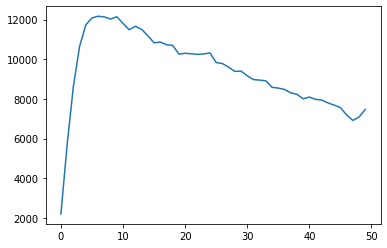

In [7]:
p_edep = arr_dose.sum(axis=(2,1))
plt.plot(p_edep)

# GATE list of interactions

## Binary format
See https://opengate.readthedocs.io/en/latest/data_output_management.html#hits-file-gatehits-dat-bin

In [8]:
import numpy as np

# dtype line format for "scanner" GATE system binary output (26 columns)
dt=np.dtype([('run_ID', np.int32), ('event_ID', np.int32), ('primary_ID', np.int32), ('source_ID', np.int32), 
             ('level1_ID', np.int32), ('level2_ID', np.int32), ('level3_ID', np.int32), ('level4_ID', np.int32), 
             ('level5_ID', np.int32), ('layer0_ID', np.int32), ('layer1_ID', np.int32), 
             ('time', np.float64), ('energy', np.float64), ('range', np.float64), 
             ('x', np.float64), ('y', np.float64), ('z', np.float64), 
             ('G4code', np.int32), ('particle_ID', np.int32), ('mother_particle_ID', np.int32), ('photon_mother_ID', np.int32), 
             ('n_Compt', np.int32), ('n_Rayl', np.int32), 
             ('process', np.dtype('S8')), ('vol_Compt', np.dtype('S8')), ('vol_Rayl', np.dtype('S8'))])

data=np.fromfile('Ex_Beam/output/list-Hits.bin', dtype=dt)
print('Number of particles:', len(data))
data

Number of particles: 59951


array([(0,    11, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1.20002846e-04, 1.02348096e-04, 3.65673974e-05,   25.0327932 ,   33.45258527, 449.50003603, 11, 3, 1, 0, 0, 0, b'msc', b'NULL', b'NULL'),
       (0,    11, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1.20002846e-04, 1.23304379e-01, 2.00980644e-01,   25.01781908,   33.44877065, 449.69834176, 11, 3, 1, 0, 0, 0, b'eBrem', b'NULL', b'NULL'),
       (0,    11, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1.20002847e-04, 9.99969354e-02, 1.78545878e-01,   24.98204004,   33.40473931, 449.86413422, 11, 3, 1, 0, 0, 0, b'eBrem', b'NULL', b'NULL'),
       ...,
       (0, 99989, 1, 0, 0, 0, 0, 0, 0, 0, 0, 9.99900003e-01, 6.82317309e-04, 2.09285755e-03,   -1.73241592,   -3.0543568 , 450.5       , 11, 2, 1, 0, 0, 0, b'Transpo', b'NULL', b'NULL'),
       (0, 99990, 1, 0, 0, 0, 0, 0, 0, 0, 0, 9.99910004e-01, 4.26538998e-02, 5.45440685e-01, -116.37870959, -124.67951601, 450.04453376, 22, 1, 0, 0, 0, 0, b'phot', b'NULL', b'NULL'),
       (0, 99991, 1, 0, 0, 0, 0, 0, 0, 0, 0, 9.99920003e-01, 8.8

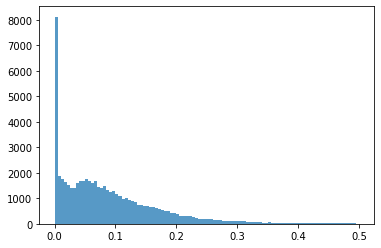

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the energy histogram
x = data['energy']

n, bins, patches = plt.hist(x, bins=100, range=[0,0.5], alpha=0.75)

## Exercise  
* select and print only data corresponding to the process 'phot'
* plot the corresponding energy histogram
* explain the energy spectrum (increase the number of primaries if necessary)

In [10]:
# complete here ...

## Solution

In [11]:
print(data[data['process'] == b'phot'])

[(0,    11, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1.20003734e-04, 0.10806836, 0.05508046,   91.40468039,  197.95038073, 449.51508073, 22,  7, 3, 0, 0, 0, b'phot', b'NULL', b'NULL')
 (0,    15, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1.60003267e-04, 0.10475175, 0.30144571,   78.56347021, -116.98068014, 449.68041346, 22,  7, 3, 1, 0, 0, b'phot', b'NULL', b'NULL')
 (0,    35, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3.60003247e-04, 0.12987115, 0.25819343,    8.31753472,  -52.07760228, 449.73175057, 22,  1, 0, 0, 0, 0, b'phot', b'NULL', b'NULL')
 ...
 (0, 99959, 1, 0, 0, 0, 0, 0, 0, 0, 0, 9.99600005e-01, 0.06526399, 0.21798404,  106.44546934,  145.46716526, 449.71353979, 22, 12, 2, 0, 0, 0, b'phot', b'NULL', b'NULL')
 (0, 99985, 1, 0, 0, 0, 0, 0, 0, 0, 0, 9.99860004e-01, 0.07137659, 0.21672359,   15.94324563, -161.6571713 , 449.69654809, 22,  6, 3, 2, 0, 0, b'phot', b'NULL', b'NULL')
 (0, 99990, 1, 0, 0, 0, 0, 0, 0, 0, 0, 9.99910004e-01, 0.0426539 , 0.54544068, -116.37870959, -124.67951601, 450.04453376, 22,  1, 0, 0, 0, 0, b'

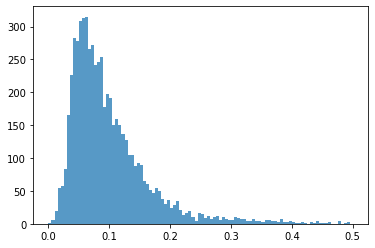

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the energy histogram
x = data[data['process'] == b'phot']['energy']

n, bins, patches = plt.hist(x, bins=100, range=[0,0.5], alpha=0.75)

## GATE ROOT Tree output

In [13]:
import uproot

f = uproot.open('Ex_Beam/output/tree.hits.root')

# all trees, branches and leaves names are accessible through the method keys()
print('Trees in the file:')
print(f.keys())
print()
print('Leaves (variables) in the Tree:')
print(f['tree'].keys())

# all variables are accessible through the method arrays() or pandas.df().to_records()
# data = f['tree'].arrays()
data = f['tree'].pandas.df().to_records()

print()
print('Number of particles:', len(data))

Trees in the file:
[b'tree;1']

Leaves (variables) in the Tree:
[b'PDGEncoding', b'trackID', b'parentID', b'trackLocalTime', b'time', b'runID', b'eventID', b'sourceID', b'primaryID', b'posX', b'posY', b'posZ', b'localPosX', b'localPosY', b'localPosZ', b'momDirX', b'momDirY', b'momDirZ', b'edep', b'stepLength', b'trackLength', b'rotationAngle', b'axialPos', b'processName', b'comptVolName', b'RayleighVolName', b'volumeID[0]', b'volumeID[1]', b'volumeID[2]', b'volumeID[3]', b'volumeID[4]', b'volumeID[5]', b'volumeID[6]', b'volumeID[7]', b'volumeID[8]', b'volumeID[9]', b'sourcePosX', b'sourcePosY', b'sourcePosZ', b'nPhantomCompton', b'nCrystalCompton', b'nPhantomRayleigh', b'nCrystalRayleigh', b'', b'level1ID', b'level2ID', b'level3ID', b'level4ID', b'level5ID', b'photonID']

Number of particles: 59951


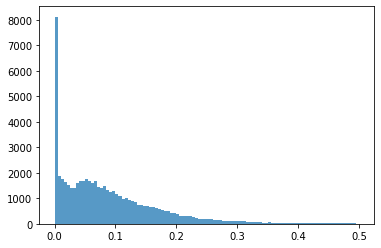

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the energy histogram
x = data['edep']

n, bins, patches = plt.hist(x, bins=100, range=[0,0.5], alpha=0.75)

In [15]:
print(data['processName'])

[b'msc' b'eBrem' b'eBrem' ... b'Transportation' b'phot' b'compt']


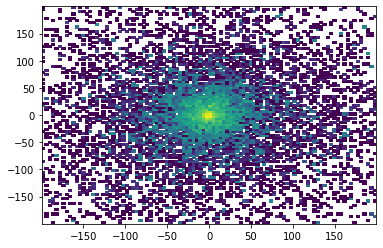

In [16]:
from matplotlib.colors import LogNorm

# Plot the particle positions
x = data['posX']
y = data['posY']

#fig = plt.scatter(x, y, alpha=0.75)
fig = plt.hist2d(x, y, bins=100, norm=LogNorm())

## GATE Numpy Tree output - New !
GATE simulations can now output information on interactions occuring in a detector in a new format: the NumPy .npy Python format. This as several advantages:
* data is easily open in Python.
* data is saved as a [Structured Arrays](https://docs.scipy.org/doc/numpy/user/basics.rec.html) which makes the access to variables very easy.

In [17]:
import numpy as np

data = np.load('Ex_Beam/output/tree.hits.npy')

print('Number of particles:', len(data))
data

Number of particles: 59951


array([(11, 3, 1, 1.82933243e-10, 1.20002846e-04, 0,    11, 0, 1,   25.032793 ,   33.452587 , 449.50003,   25.032793 ,   33.452587 , -0.49996397, -0.10595199,  0.13243283, 0.9855129 , 1.02348095e-04, 3.6567399e-05,   54.754417, 0., 450., b'msc', b'NULL', b'NULL', 0, 1, -1, -1, -1, -1, -1, -1, -1, -1,  0.5249988 , -1.0097411, -400., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
       (11, 3, 1, 1.83590068e-10, 1.20002846e-04, 0,    11, 0, 1,   25.017818 ,   33.448772 , 449.69833,   25.017818 ,   33.448772 , -0.30165824, -0.20552664, -0.04377642, 0.9776719 , 1.23304382e-01, 2.0098065e-01,   54.9554  , 0., 450., b'eBrem', b'NULL', b'NULL', 0, 1, -1, -1, -1, -1, -1, -1, -1, -1,  0.5249988 , -1.0097411, -400., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
       (11, 3, 1, 1.84164215e-10, 1.20002847e-04, 0,    11, 0, 1,   24.98204  ,   33.40474  , 449.86414,   24.98204  ,   33.40474  , -0.13586578, -0.3029986 , -0.13301666, 0.9436622 , 9.99969319e-02, 1.7854588e-01,   55.13394 , 0., 450., b'eBrem', b'NULL', b'NUL

## Exercise
Make the same data analysis as with the ROOT output:
* select and plot the histogram of the particle energies
* select and plot the particle positions

In [18]:
# complete here ...

## Solution

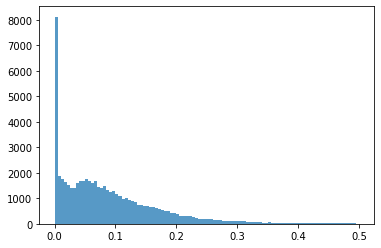

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the energy histogram
x = data['edep']

n, bins, patches = plt.hist(x, bins=100, range=[0,0.5], alpha=0.75)

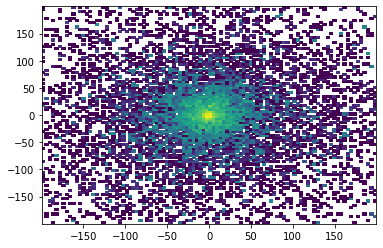

In [20]:
from matplotlib.colors import LogNorm

# Plot the particle positions
x = data['posX']
y = data['posY']

#fig = plt.scatter(x, y, alpha=0.75)
fig = plt.hist2d(x, y, bins=100, norm=LogNorm())